# Predicting Future Sales with Time series

Author: Natalija Stojchevska

## Used libraries

In [76]:
%matplotlib inline

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Abstract**



## **Workflow**

## **Helper functions**

## 1. **Data**

This project uses the  Walmart Recruiting - Store Sales Forecasting dataset(https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data). 

The dataset contains historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

**stores.csv**

This file contains anonymized information about the 45 stores, indicating the type and size of store.

**train.csv**

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

- **Store** - the store number

- **Dept** - the department number

- **Date** - the week

- **Weekly_Sales** -  sales for the given department in the given store

- **IsHoliday** - whether the week is a special holiday week

**test.csv**

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

**features.csv**

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

- **Store** - the store number

- **Date** - the week

- **Temperature** - average temperature in the region

- **Fuel_Price** - cost of fuel in the region

- **MarkDown1-5** - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

- **CPI** - the consumer price index

- **Unemployment** - the unemployment rate

- **IsHoliday** - whether the week is a special holiday week
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### 1. 1. Loading the dataset

In [78]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
stores = pd.read_csv("./data/stores.csv")
features = pd.read_csv("./data/features.csv")

In [79]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [80]:
train.shape

(421570, 5)

In [81]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [82]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [83]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [84]:
test.shape

(115064, 4)

In [85]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [86]:
test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [87]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [142]:
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [88]:
stores.shape

(45, 3)

In [89]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [90]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [91]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [92]:
features.shape

(8190, 12)

In [93]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [94]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

*Insights: These four files are all describing 45 store from different perspectives, so we are can merge them into two big datafremes - train and test*

In [95]:
train_merged = train.merge(stores, how='left').merge(features, how='left')
test_merged = test.merge(stores, how='left').merge(features, how='left')

In [96]:
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [97]:
test_merged

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


## 2. Data Visualization

Features:

- **Dept** - the department number

- **Type** - the store type (A, B or C)

- **Size** - the size of the store

- **Temperature** - average temperature in the region

- **Fuel_Price** - cost of fuel in the region

- **MarkDown1-5** - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

- **CPI** - the consumer price index

- **Unemployment** - the unemployment rate

- **IsHoliday** - whether the week is a special holiday week

Target:

- **Weekly_Sales** -  sales for the given department in the given store

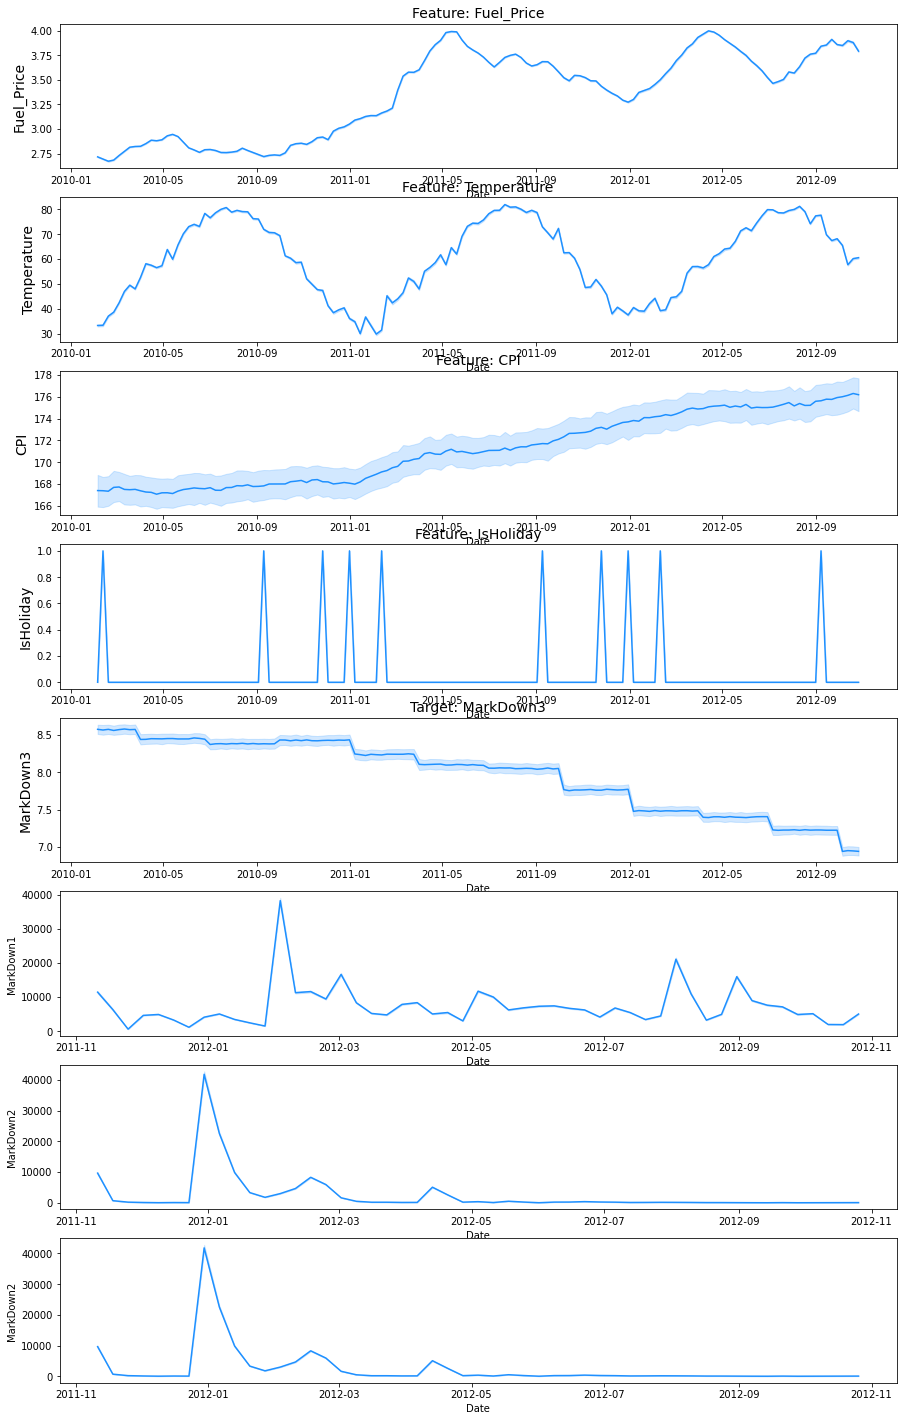

In [155]:
f, ax = plt.subplots(nrows=8, ncols=1, figsize=(15, 25))

sns.lineplot(x=train_merged.Date, y=train_merged.Temperature, ax=ax[1], color='dodgerblue')
ax[1].set_title('Feature: Temperature', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

sns.lineplot(x=train_merged.Date, y=train_merged.Fuel_Price, ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Fuel_Price', fontsize=14)
ax[0].set_ylabel(ylabel='Fuel_Price', fontsize=14)


sns.lineplot(x=train_merged.Date, y=train_merged.CPI, ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: CPI', fontsize=14)
ax[2].set_ylabel(ylabel='CPI', fontsize=14)


sns.lineplot(x=train_merged.Date, y=train_merged.IsHoliday, ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: IsHoliday', fontsize=14)
ax[3].set_ylabel(ylabel='IsHoliday', fontsize=14)


sns.lineplot(x=train_merged.Date, y=train_merged.Unemployment, ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: Unemployment', fontsize=14)
ax[4].set_ylabel(ylabel='Unemployment', fontsize=14)

sns.lineplot(x=train_merged.Date, y=train_merged.MarkDown1, ax=ax[5], color='dodgerblue')
ax[4].set_title('Target: MarkDown1', fontsize=14)
ax[4].set_ylabel(ylabel='MarkDown1', fontsize=14)

sns.lineplot(x=train_merged.Date, y=train_merged.MarkDown2, ax=ax[6], color='dodgerblue')
ax[4].set_title('Target: MarkDown2', fontsize=14)
ax[4].set_ylabel(ylabel='MarkDown2', fontsize=14)

sns.lineplot(x=train_merged.Date, y=train_merged.MarkDown3, ax=ax[7], color='dodgerblue')
ax[4].set_title('Target: MarkDown3', fontsize=14)
ax[4].set_ylabel(ylabel='MarkDown3', fontsize=14)


#for i in range(5):
    #ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

## 3. **Data Preprocessing**

### 2.1. Missing values

In [98]:
train_merged.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

*Insights: Except for 'MarkDown' columns, there are no missing values for all other colunms. The MarkDown# columns represent Walmart clearance activities, which occurrs in different stores at different time. In this case, it is normal to see many NaN values in these columns.*

In [99]:
#todo: drop markdown columns if deeded of fill with 0

### 2.2. Date columns
Since this is a TimeSeries problem, we have to parse "Date" column. The data should be in chronological order and the timestamps should be equidistant. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

In [135]:
def check_date_time_intervals(data_frame):
    data_frame = data_frame.sort_values(by="Date")

    # Check time intervals
    data_frame["Delta"] = data_frame["Date"] - data_frame["Date"].shift(1)

    return data_frame[["Date", "Delta"]]

In [139]:
train_merged_intervals = check_date_time_intervals(train_merged)
train_merged_intervals

,Date,Delta
0,2010-02-05,NaT
277665,2010-02-05,0 days
277808,2010-02-05,0 days
277951,2010-02-05,0 days
278094,2010-02-05,0 days


In [140]:
train_merged_intervals.Delta.unique()

array(['NaT',     0], dtype='timedelta64[ns]')

In [141]:
train_merged_intervals['Delta'].sum(), train_merged_intervals['Delta'].count()

(Timedelta('0 days 00:00:00'), 4)

In [110]:
def split_date(data_frame):
    data_frame["Date"] = pd.to_datetime(data_frame["Date"])
    data_frame["Year"] = data_frame["Date"].dt.year
    data_frame["Month"] = data_frame["Date"].dt.month
    data_frame["Day"] = data_frame["Date"].dt.day
    data_frame["Week_of_year"] = data_frame["Date"].dt.isocalendar().week
    return data_frame.head(5)

In [111]:
split_date(train_merged)
split_date(test_merged)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Week_of_year
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,2,44
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,9,45
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,16,46
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,2012,11,23,47
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,2012,11,30,48


In [73]:
train_merged.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Year                     int64
Month                    int64
Day                      int64
Week_of_year            UInt32
dtype: object

In [74]:
test_merged.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Year                     int64
Month                    int64
Day                      int64
Week_of_year            UInt32
dtype: object

### 2.3. 

## **Feature engineering**

## **Exploratory Data Analysis**

## **Modeling**

### Algorithm selection

## **Conclusions**

## References